# 1. Попередня обробка даних

In [ ]:
from sklearn.preprocessing import Binarizer
import pandas
import numpy

url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv'
df1 = pd.read_csv(url)
df1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


**1.1. Бінаризація (кодування) даних.** Передтворення кількісних даних в банарні шляхом задавання порогового значення.
Є багато варіантів для реалізації даного кроку передобробки. Одні з них:

In [ ]:
df1['test1'] = np.where(df1['fare'] > 15, 1, 0)
df1['test2'] = df1['fare'].apply(lambda x: 1 if x > 15 else 0)
df1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,test,test1,test2
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0,0,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1,1,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0,0,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1,1,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0,0,0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1,1,1
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,1,1,1
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,1,1,1


**1.2. Заповнення пропущених значень.**

Часто в даних, з якими необхідно працювати, присутні пропуски, в результаті чого аналітик виявляється перед вибором: ігнорувати, відкинути або ж заповнити пропущені значення. Заповнення пропусків часто і цілком обгрунтовано здається більш привабливим рішенням. Однак це не завжди так.

Невдалий вибір методу заповнення пропусків може не тільки не поліпшити, а й сильно погіршити результати.
Існують досить прості в реалізації і використанні методи обробки пропусків, що отримали назву ad-hoc методи, простота яких може послужити причиною їх вибору:

* Заповнення пропусків нулями;
* Заповнення медианой;
* Заповнення середнім арифметичним значенням;
* Введення індикаторних змінних тощо.

І, хоча за станом на сьогоднішній день відомо, що застосування цих методів може призводити до спотворення статистичних властивостей вибірки і, як наслідок, до погіршення результатів, одержуваних після такої обробки пропусків, їх як і раніше часто використовують.



**Заповнення пропуску середнім значенням (Mean Substitution)** (інші варіанти: заповнення нулем, медианою і тд) - назва методу говорить сама за себе.

Всім варіантам даного методу властиві одні і ті ж недоліки. Розглянемо ці недоліки на прикладі одного з найбільш простих способів заповнення пропусками безперервної характеристики: заповнення пропусків середнім арифметичним значенням.

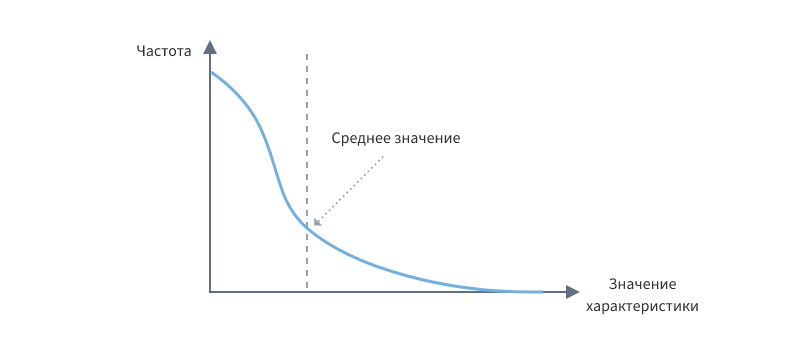

Розподіл значень неперервної характеристики до заповнення пропусків

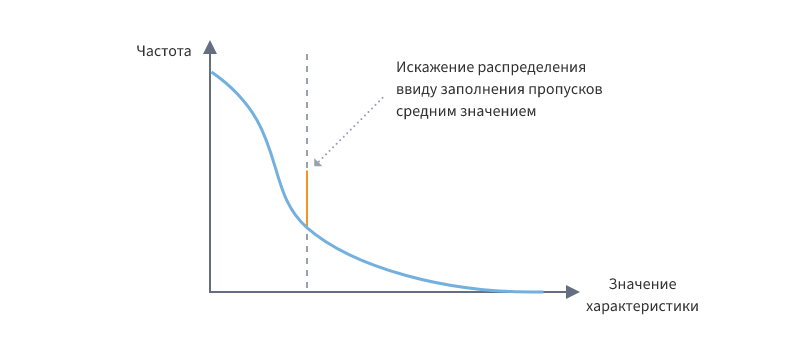

Розподіл значень неперервної характеристики після заповнення пропусків

**LOCF (Last observation carried forward)** - повторення результату останнього спостереження. Даний метод застосовується, як правило, при заповненні пропусків у часових рядах, коли наступні значення апріорі сильно взаємопов'язані з попередніми.

Приклад 1. Якщо ми вимірюємо температуру повітря в деякій географічній точці на відкритому просторі, причому вимірювання проводяться кожну хвилину, то при нормальних умовах - якщо виключити природні катаклізми - вимірювана величина апріорі не може різко (на 10-20 °C) змінитися за такий короткий інтервал часу між подальшими вимірами. Отже, заповнення пропусків попереднім відомим значенням в такій ситуації обгрунтовано.

Приклад 2. Якщо дані представляють собою результати вимірювання (припустимо, тієї ж температури повітря) в один і той же момент часу в близьких географічних точках таким чином, що гіпотеза про малих змінах значень від однієї точки набору даних до іншої залишається справедливою, то знову ж таки використання LOCF логічно.

**Indicator Method** - метод, який передбачає заміну пропущених значень нулями і додавання спеціального атрибута-індикатора, що приймає нульові значення для записів, де дані з самого початку не містили пропусків, і ненульові значення там, де раніше були пропуски [Miettinen, 1985].

На практиці застосовуються і модифікації цього методу, які передбачають заповнення пропусків ненульовими значеннями. Варто відзначити, що при такому заповненні (наприклад, середнім) допустимо використання інверсних значень поля прапорів (тобто 0 - для випадку, коли у вихідних даних значення спочатку були пропущені, і нульове значення для випадків, коли значення поля вихідних даних було відомо).

Також при заповненні пропусків ненульовими значеннями часто додається взаємодія поля-індикатора і вихідного поля.

До переваг даного методу відносяться:

Використання всього набору даних (репрезентативність вибірки не страждає).
Явне використання інформації про пропущені значеннях.

**Відновлення пропусків на основі регресійних моделей.** Даний метод полягає в тому, що пропущені значення заповнюються за допомогою моделі лінійної регресії, побудованої на відомих значеннях набору даних.

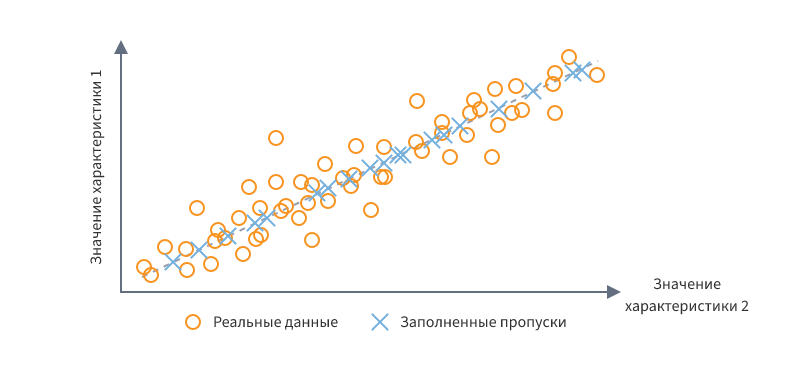

*Метод лінійної регресії* дозволяє отримати правдоподібно заповнені дані. Однак реальним даним властивий деякий розкид значень, який при заповненні пропусків на основі лінійної регресії відсутній. Як наслідок, варіація значень характеристики стає менше.

**1.3. Нормалізація Даних.**

*Нормалізація* - це процедура предобработки вхідної інформації (навчальних, тестових і валідаційних вибірок, а також реальних даних), при якій значення ознак у вхідному векторі приводяться до деякого заданого діапазону, наприклад, [0 ... 1] або [-1 ... 1] [1 ].
Слід відрізняти поняття нормалізації і нормування.

*Нормалізація* - це коригування значень відповідно до деякої функції перетворення, з метою зробити їх більш зручними для порівняння. Це потрібно, коли несумісність одиниць вимірювань змінних може відбитися на результатах і рекомендується, коли підсумкові звіти можуть бути поліпшені, якщо висловити результати в певних зрозумілих / сумісних одиницях. Наприклад, час реакції, записаний в мілісекундах, легше інтерпретувати, ніж число тактів процесора, в яких були отримані дані експерименту.

*Нормування* - це процес встановлення гранично допустимих або оптимальних нормативних значень в прикладних сферах діяльності, наприклад, нормування праці. Як правило, норми розробляються за результатами дослідних, проектних або наукових робіт, а також на основі експертних оцінок.

Вихідні значення ознак можуть змінюватися в дуже великому діапазоні і відрізнятися один від одного на кілька порядків. Припустимо, датасет містить відомості про концентрацію діючої речовини, яка вимірюється в десятих або сотих частках відсотків, і показники тиску в сотнях тисяч атмосфер. Або, наприклад, в одному вхідному векторі присутня інформація про вік і доходи клієнта.

Будучи різними за фізичним змістом, дані сильно розрізняються між собою за абсолютними величинами. Робота з такими показниками виявиться некоректною: дисбаланс між значеннями ознак може викликати нестійкість роботи методів аналізу даних. 

Після нормалізації все числові значення вхідних ознак будуть приведені до однакової області їх зміни - деякого вузького діапазону.

На практиці найбільш поширені такі методи нормалізації ознак:

*Мінімакс* - лінійне перетворення даних в діапазоні [0..1], де мінімальні і максимальні масштабовані значення відповідають 0 і 1 відповідно;

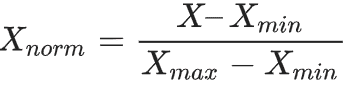

*Z-масштабування даних* на основі середнього значення і стандартного відхилення: розподіл різниці між змінною і середнім значенням ділене стандартне відхилення;

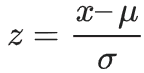

### Завдання
Реалізувати всі процедури підготовки даних у вигляді функцій:
1. Бінаризація даних.
2. Кодування текстових даних
3. Заповнення пропущенних значень
4. Процедури нормалізації даних
